# Lecture 7: SciPy

### SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy
### Include many useful functions for scientific research -- do not invent a wheel by yourself

### SciPy sub-packages

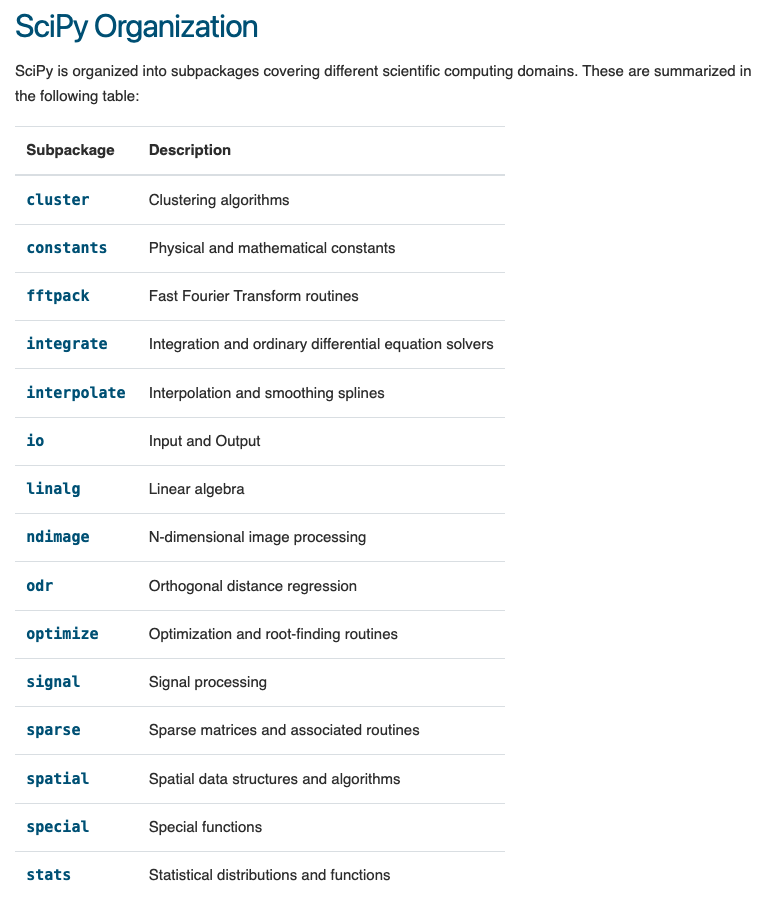

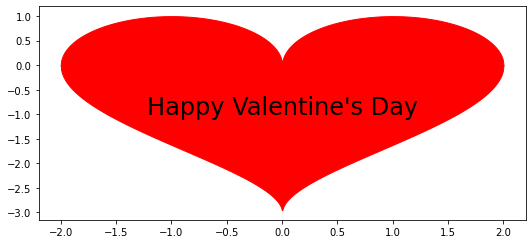

In [3]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = np.linspace(-2, 2, 1000)
y1 = np.sqrt(1 - (abs(x) - 1) ** 2)
y2 = -3 * np.sqrt(1 - (abs(x) / 2) ** 0.5)

plt.fill_between(x, y1, color='red')
plt.fill_between(x, y2, color='red')

plt.text(0, -1.0, "Happy Valentine's Day", fontsize=24, color='black',
horizontalalignment='center')

plt.show()

### Today we will introduce some possibly most useful sub-packages used in Environmental science/Ecology
#### interpolate; optimize

### Interpolate
Check out more at https://docs.scipy.org/doc/scipy/reference/interpolate.html

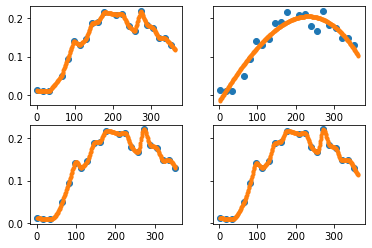

In [2]:
# examples of 1D interpolation

import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("PicnicPointEVI.csv", delimiter=',', skiprows = 1)
year = data[:,0]
doy = data[:,1]
evi = data[:,2]

ft = (evi > 0) & (evi < 0.4)

doy = doy[ft]
evi = evi[ft]

from scipy import interpolate as intp

interp_func = intp.interp1d(doy, evi, fill_value='extrapolate')
xi = np.arange(1, 365)
yi = interp_func(xi)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey='row')
ax1.plot(doy, evi, 'o')
ax1.plot(xi, yi, '.')

interp_func = intp.UnivariateSpline(doy, evi)
xi = np.arange(1, 365)
yi = interp_func(xi)
ax2.plot(doy, evi, 'o')
ax2.plot(xi, yi, '.')

interp_func = intp.Akima1DInterpolator(doy, evi)
xi = np.arange(1, 365)
yi = interp_func(xi)
ax3.plot(doy, evi, 'o')
ax3.plot(xi, yi, '.')

interp_func = intp.PchipInterpolator(doy, evi)
xi = np.arange(1, 365)
yi = interp_func(xi)
ax4.plot(doy, evi, 'o')
ax4.plot(xi, yi, '.')

<AxesSubplot:>

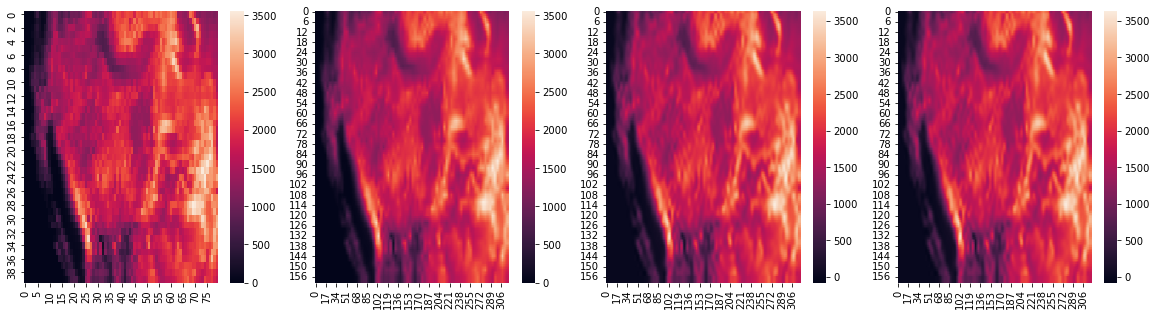

In [3]:
# examples of 2D interpolation

import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate as intp
import seaborn as sns


fname = "globalelev.txt"
elev = np.loadtxt(fname)
elev = elev[180:220,220:300]


fig, axes = plt.subplots(1,4,figsize=(20,5))
                         
sns.heatmap(elev, ax=axes[0])
#sns.heatmap(elev)

nlat, nlon = elev.shape
x = np.arange(0, nlat)
y = np.arange(0, nlon)

xi = np.arange(0, nlat, 1/4)
yi = np.arange(0, nlon, 1/4)

interp_func = intp.interp2d(y, x, elev, kind = 'linear')
zzi = interp_func(yi, xi)
sns.heatmap(zzi, ax=axes[1])

interp_func = intp.interp2d(y, x, elev, kind = 'cubic')
zzi = interp_func(yi, xi)
sns.heatmap(zzi, ax=axes[2])

interp_func = intp.RectBivariateSpline(x, y, elev)
zzi = interp_func(xi, yi)
sns.heatmap(zzi, ax=axes[3])

## Optimize

In [4]:
# find a root for an equation
from scipy.optimize import root
import numpy as np
from math import cos, sin

def eqn(x):
    return x + cos(x) + sin(x)**2
   #return x**2 + 2*x + 1

myroot = root(eqn, 0)

print(myroot.x)

[-1.22427946]


In [59]:
# finding the minimum of a function
from scipy.optimize import minimize

def eqn(x):
  return x**2 + x + 2

mymin = minimize(eqn, 0, method='BFGS')

print(mymin)

      fun: 1.75
 hess_inv: array([[0.50000001]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([-0.50000001])


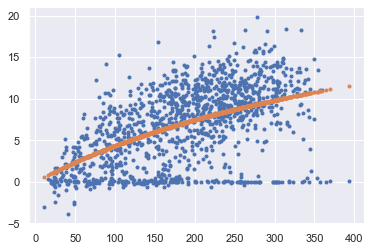

In [87]:
from scipy.optimize import minimize
import numpy as np
plt.plot(SW_f, GPP_f, '.')

def costfunc(param, SW_f, GPP_f):
    alpha, Amax = param
    
    GPPpred = SW_f/(SW_f+alpha) * Amax
    
    return (np.mean((GPPpred - GPP_f)**2))**0.5
    


data = np.loadtxt("Wcr_GPPdaily.csv", delimiter = ",", skiprows = 1)
T = data[:, 1]
SW = data[:, 2]
VPD = data[:, 3]
GPP = data[:, -1]

ft = (GPP > -999) & (T > 10) & (VPD < 5)
SW_f = SW[ft]
GPP_f = GPP[ft]

guess = [10, 10]
mymin = minimize(costfunc, guess, args=(SW_f, GPP_f))
alpha, Amax = mymin.x
plt.plot(SW_f, SW_f/(SW_f+alpha) * Amax, '.')

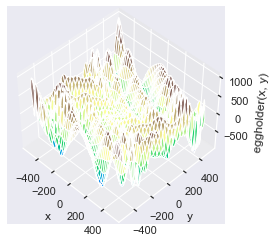

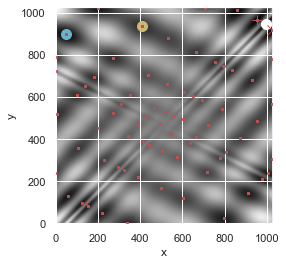

In [91]:
def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
            -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

bounds = [(-512, 512), (-512, 512)]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')
plt.show()

from scipy import optimize
results = dict()
results['shgo'] = optimize.shgo(eggholder, bounds)
results['shgo']

results['DA'] = optimize.dual_annealing(eggholder, bounds)
results['DE'] = optimize.differential_evolution(eggholder, bounds)
results['BH'] = optimize.basinhopping(eggholder, bounds)
results['shgo_sobol'] = optimize.shgo(eggholder, bounds, n=200, iters=5,
                                      sampling_method='sobol')

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(eggholder(xy), interpolation='bilinear', origin='lower',
               cmap='gray')
ax.set_xlabel('x')
ax.set_ylabel('y')

def plot_point(res, marker='o', color=None):
    ax.plot(512+res.x[0], 512+res.x[1], marker=marker, color=color, ms=10)

plot_point(results['BH'], color='y')  # basinhopping           - yellow
plot_point(results['DE'], color='c')  # differential_evolution - cyan
plot_point(results['DA'], color='w')  # dual_annealing.        - white

# SHGO produces multiple minima, plot them all (with a smaller marker size)
plot_point(results['shgo'], color='r', marker='+')
plot_point(results['shgo_sobol'], color='r', marker='x')
for i in range(results['shgo_sobol'].xl.shape[0]):
    ax.plot(512 + results['shgo_sobol'].xl[i, 0],
            512 + results['shgo_sobol'].xl[i, 1],
            'ro', ms=2)

ax.set_xlim([-4, 514*2])
ax.set_ylim([-4, 514*2])
plt.show()